## Regresión logística vs Redes Neuronales

## 1. Dataset

El Dataset usado corresponde a información recolectada de un grupo de 30 voluntarios dentro de un rango de edad de 19-48 años. Cada persona realizó seis actividades:
1. WALKING, 
2. WALKING_UPSTAIRS
3. WALKING_DOWNSTAIRS
4. SITTING
5. STANDING, 
6. LAYING

usando un teléfono inteligente (Samsung Galaxy S II) en la cintura. Con su acelerómetro y giroscopio integrados, se capturó la aceleración lineal 3-axial y la velocidad angular 3-axial a una velocidad constante de 50Hz.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

import pandas as pd

from sklearn.metrics import f1_score

data = pd.read_csv('smartphone_activity_dataset.csv')

predictors = list(data.keys())
predictors.remove('activity')

scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(data[predictors], 
                                                    data['activity'], 
                                                    train_size=0.5)

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## 2. Regresión Logística

In [12]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

tamanho = 10
C = np.logspace(-2,2,tamanho)
F1_l1 = np.zeros(tamanho)
F1_l2 = np.zeros(tamanho)

for i in range(tamanho):
    
    clf_l1 = LogisticRegression(C=C[i], penalty='l1', solver='saga', tol=0.1)
    clf_l2 = LogisticRegression(C=C[i], penalty='l2', solver='saga', tol=0.1)
    clf_l1.fit(x_train, y_train)
    clf_l2.fit(x_train, y_train)
    F1_l1[i] = f1_score(y_test, clf_l1.predict(x_test), average='macro')
    F1_l2[i] = f1_score(y_test, clf_l2.predict(x_test), average='macro')
    
    

[]

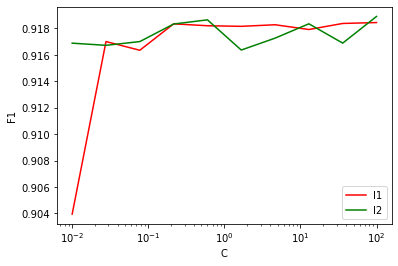

In [13]:
plt.figure()
plt.plot(C, F1_l1,  "r-",  label = 'l1')
plt.plot(C, F1_l2,  "g-", label = 'l2')
plt.legend()
plt.xlabel('C')
plt.ylabel('F1')
plt.semilogx()

# Redes neuronales

In [4]:
import sklearn.neural_network
neuronas = np.arange(1,7)
F1_1capa = np.zeros(6)
F1_2capa = np.zeros(6)
for i in neuronas:
    mlp_1 = sklearn.neural_network.MLPClassifier(activation='logistic', 
                                           hidden_layer_sizes=(i), 
                                           max_iter=2000)
    mlp_2 = sklearn.neural_network.MLPClassifier(activation='logistic', 
                                           hidden_layer_sizes=(int((i+1)/2),i+1), 
                                           max_iter=2000)
    mlp_1.fit(x_train, y_train)
    mlp_2.fit(x_train, y_train)
    F1_1capa[i-1] = f1_score(y_test, mlp_1.predict(x_test), average='macro')
    F1_2capa[i-1] = f1_score(y_test, mlp_2.predict(x_test), average='macro')
    

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0, 0.5, 'F1')

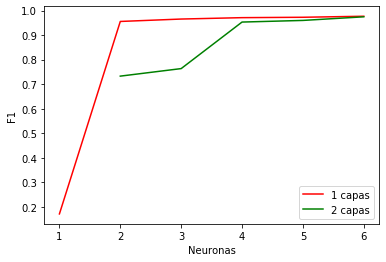

In [5]:
plt.figure()
plt.plot(neuronas, F1_1capa,  "r-",  label = '1 capas')
plt.plot(neuronas[1:], F1_2capa[:-1],  "g-", label = '2 capas')
plt.legend()
plt.xlabel('Neuronas')
plt.ylabel('F1')

In [14]:
print('max F1 Regresión lineal: %f'%np.max(F1_l1))
print('max F1 Red neuronal 1c: %f'%np.max(F1_1capa))
print('max F1 Red neuronal 2c: %f'%np.max(F1_2capa))


max F1 Regresión lineal: 0.918446
max F1 Red neuronal 1c: 0.976831
max F1 Red neuronal 2c: 0.974524


De acuerdo con los resultados obtenidos, es posible observar que añadiir una segunda capa no mejora de manera significativa los resultados finales. Por otro lado, aumentar el número de neuronas en la última capa de ambas redes neuronales si resulta en una mejora en los resultados de la clasificación. 

La clasificación de las redes neuronales en comparación con la regresión logística es mejor.

In [11]:
from sklearn.metrics import confusion_matrix
print('Red neuronal 1 capa, 6 neuronas')
confusion_matrix(y_test, mlp_1.predict(x_test))

Red neuronal 1 capa, 6 neuronas


array([[845,   3,   0,   0,   0,   0],
       [  4, 775,   7,   0,   0,   0],
       [  1,   4, 689,   0,   0,   0],
       [  0,   1,   0, 839,  49,   2],
       [  0,   0,   0,  47, 880,   1],
       [  0,   0,   0,   4,   0, 999]], dtype=int64)

Los resultados que presentan errores son en su mayoría las actividades de SITTING y STANDING